# Dataset preprocessing to extract segmented images

In [3]:
import cv2
import io
import matplotlib.pyplot as plt
import numpy as np
import time
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

In [36]:
# params
model_size = "small" # small, medium, large
device = "cpu" # cuda:0, cpu
image_path = "data/charmander/00000014.jpg"

In [37]:
# load image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [38]:
models_route = "model_checkpoints/"
# download model checkpoint (https://github.com/facebookresearch/segment-anything#model-checkpoints)
if(model_size == "small"):
    sam_checkpoint = models_route + "sam_vit_b_01ec64.pth"
    model_type = "vit_b"

if(model_size == "medium"):
    sam_checkpoint = models_route + "sam_vit_l_0b3195.pth"
    model_type = "vit_l"

if(model_size == "large"):
    sam_checkpoint = models_route + "sam_vit_h_4b8939.pth"
    model_type = "vit_h"

# load model and send to device
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

/Users/marta.martinez/workspace/seminario/seminario-foundation-models/.env/lib/python3.10/site-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-11): 12 x Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(in_features=3072, out_features=768, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d()
    )


In [39]:
#load mask generator
mask_generator = SamAutomaticMaskGenerator(sam)

# get time
start = time.time()

masks = mask_generator.generate(image)

# get time
end = time.time()
print('Elapsed time = ' + str((end - start)*1000) + ' ms')

Elapsed time = 86318.42994689941 ms


In [10]:
#plot image with all masks overlayed
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

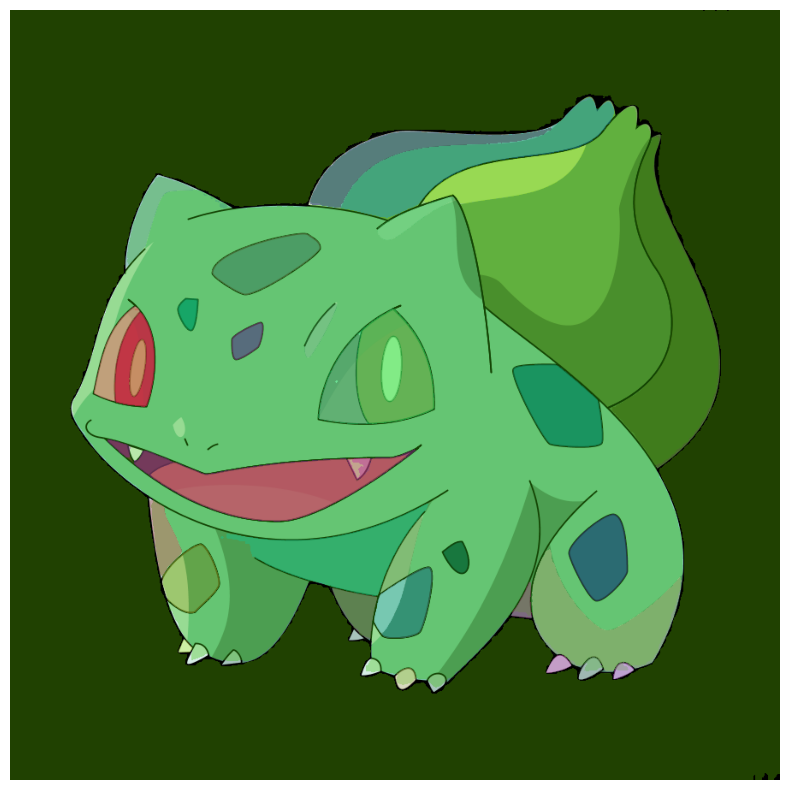

In [32]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show()

In [41]:
def get_biggest_mask(masks):
    if len(masks) == 0:
        return None
    sorted_masks = sorted(masks, key=(lambda x: x['area']), reverse=True)
    return sorted_masks[0]

In [42]:
biggest_mask = get_biggest_mask(masks)
print(biggest_mask['area'])

4258779


Area -  423160


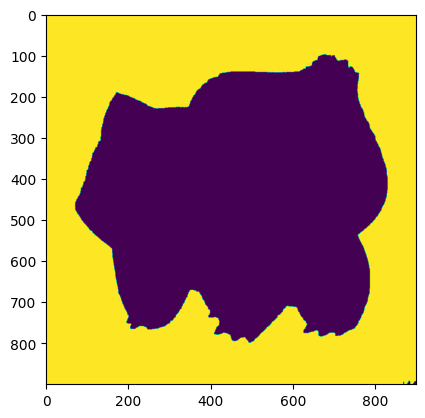

In [33]:
img_test=masks[0]['segmentation']
print("Area - ",masks[0]['area'])
plt.imshow(img_test)
plt.show()

Area -  4258779


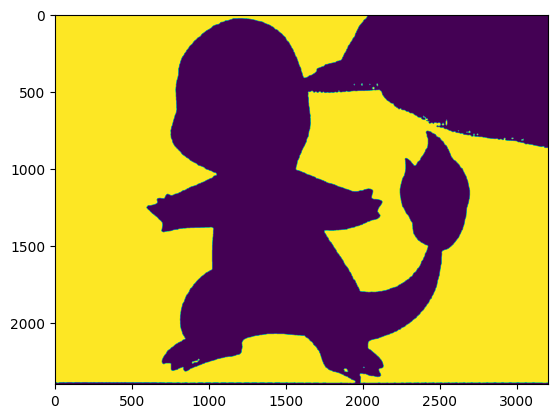

In [40]:
img_test=masks[0]['segmentation']
print("Area - ",masks[0]['area'])
plt.imshow(img_test)
plt.show()